In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [26]:
#Load the clean data
model_data= pd.read_csv("/Users/sa24/Desktop/Banking TLAB/Banking-Fraud-Analysis/Raw Banking Data/Modeling_df.csv")

In [27]:
# Store a list of features in x, isFraud won't be included because it's the target
X = model_data.drop(columns=['isFraud'], axis=1)

# assign isFraud to y because it's the target
y= model_data['isFraud']

In [28]:
#split the data to run multiple trianing test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
#Get description of the data in X_train 
X_train.describe

<bound method NDFrame.describe of          Unnamed: 0     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5851684     5938017  206190.55         806.00            0.00       418927.97   
4325514     4375358   21929.47       13305.00            0.00            0.00   
4151915     4198251  194528.27         237.00       194765.27        23076.78   
5157502     5225927  594301.20           0.00            0.00       681894.68   
1635108     1642204  183834.54      258953.00        75118.46      1405019.80   
...             ...        ...            ...             ...             ...   
1570006     1576579  337531.20       42066.00            0.00            0.00   
2234489     2248040    5456.44         204.00            0.00            0.00   
4926484     4989201  435924.24      211587.58            0.00       598217.88   
4304572     4353953   95608.96       49995.00            0.00      2587015.44   
1692743     1700352   20423.67         347.00            0.00            0.

In [30]:
#Check the shape of both X_train and X_test
X_train.shape, X_test.shape

((5011792, 10), (1252948, 10))

In [31]:
#create the prediction model using logistic regression 
model = LogisticRegression(max_iter= 1000, random_state= 42)

#Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [37]:
#Create the prediction Model
y_pred = model.predict_proba(X_test)
y_pred= (y_pred[:, 1] > 0.5).astype(int)
regress = f1_score(y_test, y_pred)

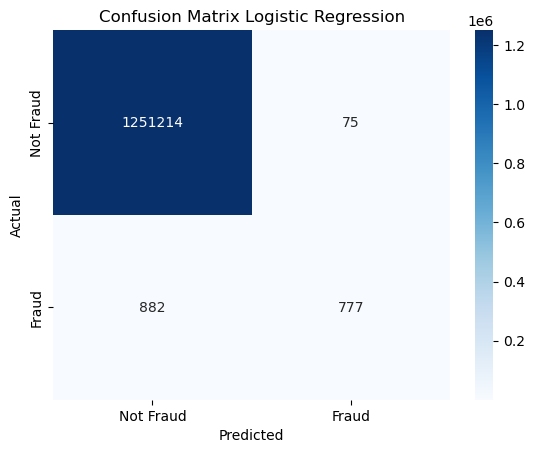

In [ ]:
#Plot the confusion matrix
the_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix Logistic Regression')
plt.show()

In [40]:
# Calculate the False Positive Rate, True Positive Rate, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate Youden's J statistic to find the best threshiold
youden_j = tpr - fpr
threshold_index = youden_j.argmax()
threshold = thresholds[threshold_index]

print(f"Best Threshold: {threshold:.4f}")

# Calculate the Area under curve 
roc_auc = auc(fpr,tpr)
print(f"Area Under Curve: {roc_auc}")

Best Threshold: 0.0025
Area Under Curve: 0.9860286225948082


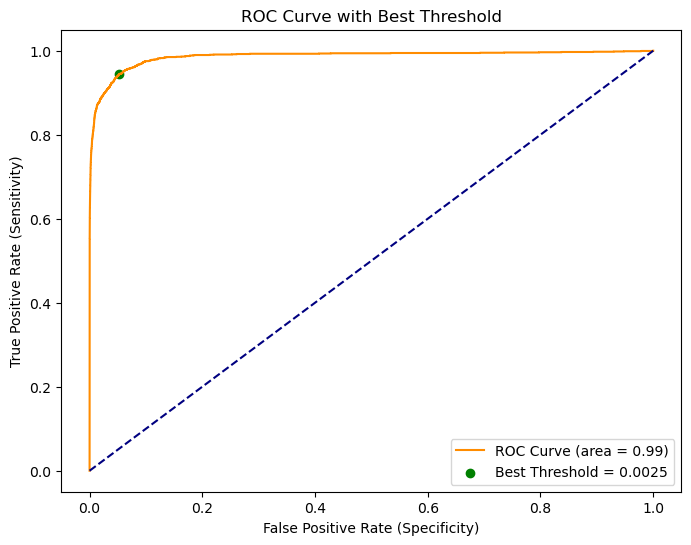

In [44]:
# Plot ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange",label="ROC Curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy" , linestyle="--")
#Plot the bst fitting threshold
plt.scatter(fpr[threshold_index], tpr[threshold_index], color="green", label=f"Best Threshold = {threshold:.4f}")
plt.xlabel("False Positive Rate (Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve with Best Threshold")
plt.legend(loc="lower right")
plt.show()

In [45]:
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')
    print(f'{name} - Precision: {precision:.4f}')
    print(f'{name} - Recall: {recall:.4f}')
    print(f'{name} - F1_Score: {f1:.4f}')

In [48]:
# Print evaluation results
evaluate_model('Logistic Regression', y_test, y_pred)


Logistic Regression - Accuracy: 0.9992
Logistic Regression - Precision: 0.9120
Logistic Regression - Recall: 0.4684
Logistic Regression - F1_Score: 0.6189
